In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv(r"C:\Users\bhara\Downloads\retail_store_sales.csv")

In [3]:
df.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,NaN,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,NaN,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


File Name: retail_store_sales.csv
Number of Rows: 12,575
Number of Columns: 11

The Dirty Retail Store Sales dataset contains 12,575 rows of synthetic data representing sales transactions from a retail store. 
The dataset includes eight product categories with 25 items per category, each having static prices. It is designed to simulate real-world 
sales data, including intentional"dirtiness" such as missing or inconsistent values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

Transaction ID------A unique identifier for each transaction.------ Always present and unique.	TXN_1234567
Customer ID	--------A unique identifier for each customer.----- 25 unique customers.	CUST_01
Category-------	The category of the purchased item.	-----Food, Furniture
Item------	The name of the purchased item. May contain missing values or None.	-----Item_1_FOOD, None
Price Per Unit----The static price of a single unit of the item. -------May contain missing or None values.	4.00, None
Quantity------	The quantity of the item purchased.----- May contain missing or None values.	1, None
Total Spent	----The total amount spent on the transaction. ----Calculated as Quantity * Price Per Unit.	8.00, None
Payment Method------The method of payment used. -----May contain missing or invalid values.	Cash, Credit Card
Location------The location where the transaction occurred.----- May contain missing or invalid values.	In-store, Online
Transaction Date-----The date of the transaction. ----- Always present and valid.	2023-01-15
Discount Applied-----Indicates if a discount was applied to the transaction.------- May contain missing values.	True, False, None

In [8]:

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], infer_datetime_format=True)
df.head(2)


C:\Users\bhara\AppData\Local\Temp\ipykernel_13672\3548817239.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Transaction Date'] = pd.to_datetime(df['Transaction Date'], infer_datetime_format=True)


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True


In [9]:
print(df["Transaction Date"].dtype)

datetime64[ns]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


In [11]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [12]:
df["Price Per Unit"] = df["Price Per Unit"].fillna(df["Total Spent"] / df["Quantity"])
df["Quantity"] = df["Quantity"].fillna(df["Total Spent"] / df["Price Per Unit"])

We successfully determined all the values for Price Per Unit, but we were unable to find the values for Quantity and Total Spent in some cases. This is because, when trying to calculate Total Spent, the Price Per Unit is available, but Quantity is missing, making it impossible to compute. Similarly, when trying to determine Quantity, the Total Spent is available, but Price Per Unit is missing, leading to the same issue.

In [14]:
df['Item'] = df.groupby(['Category','Price Per Unit'])['Item'].transform(lambda x: x.ffill().bfill())

In [15]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [16]:
df.head(10)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
5,TXN_7482416,CUST_09,Patisserie,Item_11_PAT,20.0,10.0,200.0,Credit Card,Online,2023-11-30,NaN
6,TXN_3652209,CUST_07,Food,Item_1_FOOD,5.0,8.0,40.0,Credit Card,In-store,2023-06-10,True
7,TXN_1372952,CUST_21,Furniture,Item_20_FUR,33.5,NaN,NaN,Digital Wallet,In-store,2024-04-02,True
8,TXN_9728486,CUST_23,Furniture,Item_16_FUR,27.5,1.0,27.5,Credit Card,In-store,2023-04-26,False
9,TXN_2722661,CUST_25,Butchers,Item_22_BUT,36.5,3.0,109.5,Cash,Online,2024-03-14,False


In [17]:
# Step 1: Compute the average quantity for missing values
avg_quantity = df.groupby(['Customer ID','Category'])['Quantity'].mean().reset_index()

In [18]:
avg_quantity.head(2)

,Customer ID,Category,Quantity
0,CUST_01,Beverages,5.203125
1,CUST_01,Butchers,5.412698


In [19]:

avg_quantity.rename(columns={'Quantity': 'Avg_Quantity'}, inplace=True)

# Step 2: Merge the average quantity back into the original dataset
df = pd.merge(df, avg_quantity, on=['Customer ID', 'Category'], how='left')

# Step 3: Fill missing values in "Quantity"
df['Quantity'].fillna(df['Avg_Quantity'], inplace=True)

# Step 4: Drop the extra column
df.drop(columns=['Avg_Quantity'], inplace=True)


C:\Users\bhara\AppData\Local\Temp\ipykernel_13672\2902475659.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Quantity'].fillna(df['Avg_Quantity'], inplace=True)


In [20]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                   0
Price Per Unit         0
Quantity               0
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [21]:
df["Total Spent"] = df["Total Spent"].fillna(df["Price Per Unit"] * df["Quantity"])


In [22]:
df['Discount Applied'] = df['Discount Applied'].fillna("Info Not Available")


In [23]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [24]:
df['Month Name'] = df['Transaction Date'].dt.month_name()
df['Day of Week'] = df['Transaction Date'].dt.day_name()
df["Year"] = df["Transaction Date"].dt.year

In [25]:
df.head(4)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Month Name,Day of Week,Year
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,April,Monday,2024
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,July,Sunday,2023
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,October,Wednesday,2022
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,Info Not Available,May,Saturday,2022


In [26]:
df.head(2)

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Month Name,Day of Week,Year
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,April,Monday,2024
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,July,Sunday,2023


In [27]:
df.describe()

,Price Per Unit,Quantity,Total Spent,Transaction Date,Year
count,12575.000000,12575.000000,12575.000000,12575,12575.000000
mean,23.369304,5.537049,129.704781,2023-07-12 20:23:41.105368064,2023.042386
min,5.000000,1.000000,5.000000,2022-01-01 00:00:00,2022.000000
25%,14.000000,3.000000,52.000000,2022-09-30 00:00:00,2022.000000
50%,23.000000,5.638889,109.500000,2023-07-13 00:00:00,2023.000000
75%,33.500000,8.000000,191.666667,2024-04-24 00:00:00,2024.000000
max,41.000000,10.000000,410.000000,2025-01-18 00:00:00,2025.000000
std,10.748728,2.789522,93.422736,NaN,0.855581


In [28]:
df[["Location", "Item", "Payment Method"]] = df[["Location", "Item", "Payment Method"]].astype("object")


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              12575 non-null  object        
 4   Price Per Unit    12575 non-null  float64       
 5   Quantity          12575 non-null  float64       
 6   Total Spent       12575 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  12575 non-null  object        
 11  Month Name        12575 non-null  object        
 12  Day of Week       12575 non-null  object        
 13  Year              12575 non-null  int32         
dtypes: datetime64[ns](1), 

C:\Users\bhara\AppData\Local\Temp\ipykernel_13672\1941810489.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x="Total Spent", y="Category", palette="viridis")


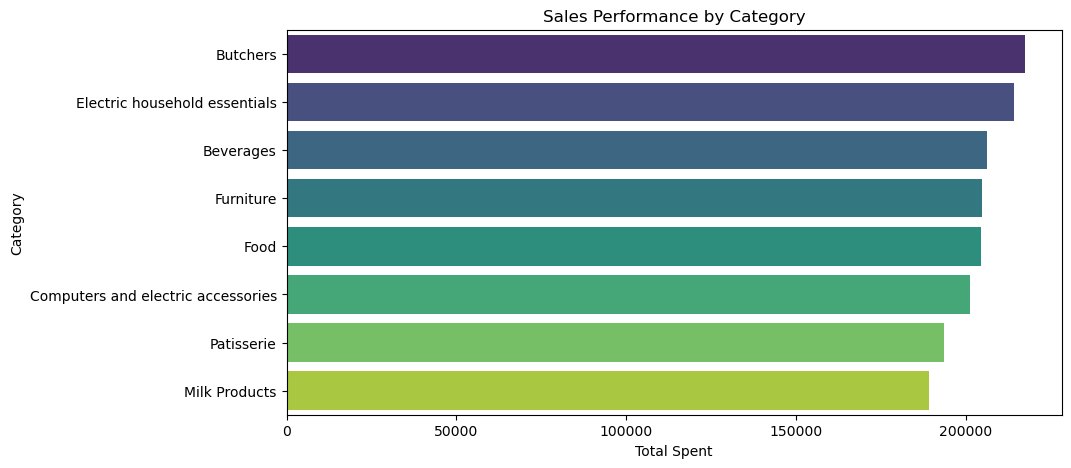

In [31]:

import matplotlib.pyplot as plt
import seaborn as sns
category_sales = df.groupby("Category")["Total Spent"].sum().reset_index().sort_values(by="Total Spent", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=category_sales, x="Total Spent", y="Category", palette="viridis")
plt.title("Sales Performance by Category")
plt.show()



C:\Users\bhara\AppData\Local\Temp\ipykernel_13672\4088520620.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=customer_spending, x="Total Spent", y="Customer ID", palette="magma")


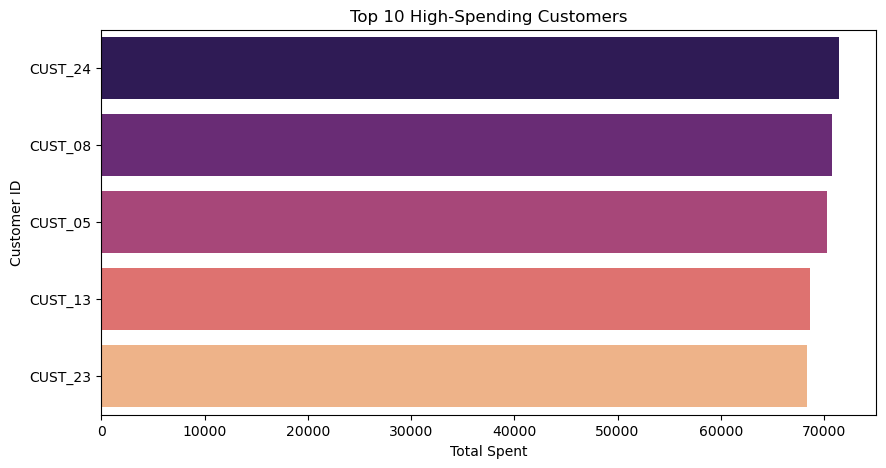

In [33]:

customer_spending = df.groupby("Customer ID")["Total Spent"].sum().reset_index().sort_values(by="Total Spent", ascending=False).head(5)

plt.figure(figsize=(10, 5))
sns.barplot(data=customer_spending, x="Total Spent", y="Customer ID", palette="magma")
plt.title("Top 10 High-Spending Customers")
plt.show()


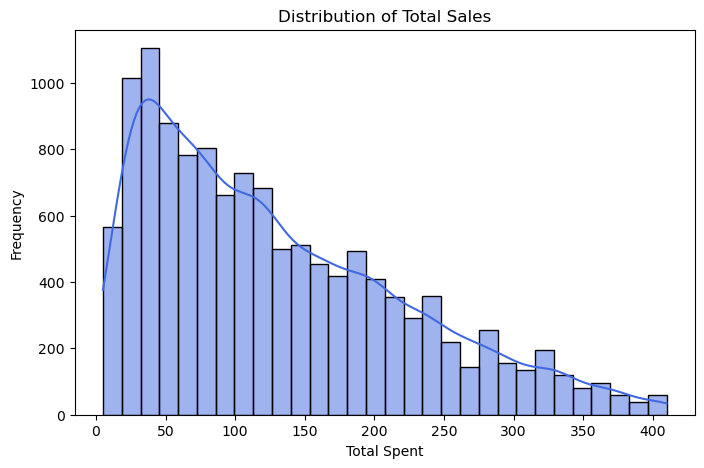

In [35]:

plt.figure(figsize=(8,5))
sns.histplot(df["Total Spent"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Total Sales")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.show()

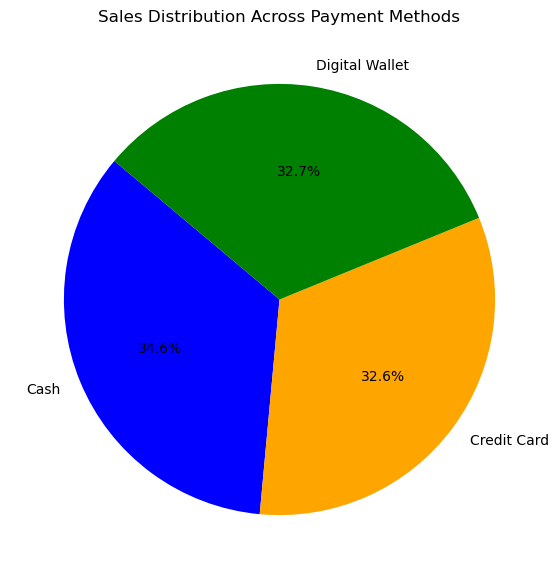

In [37]:
payment_sales = df.groupby("Payment Method")["Total Spent"].sum()

plt.figure(figsize=(7,7))
plt.pie(payment_sales, labels=payment_sales.index, autopct='%1.1f%%', colors=["blue", "orange", "green"], startangle=140)
plt.title("Sales Distribution Across Payment Methods")
plt.show()

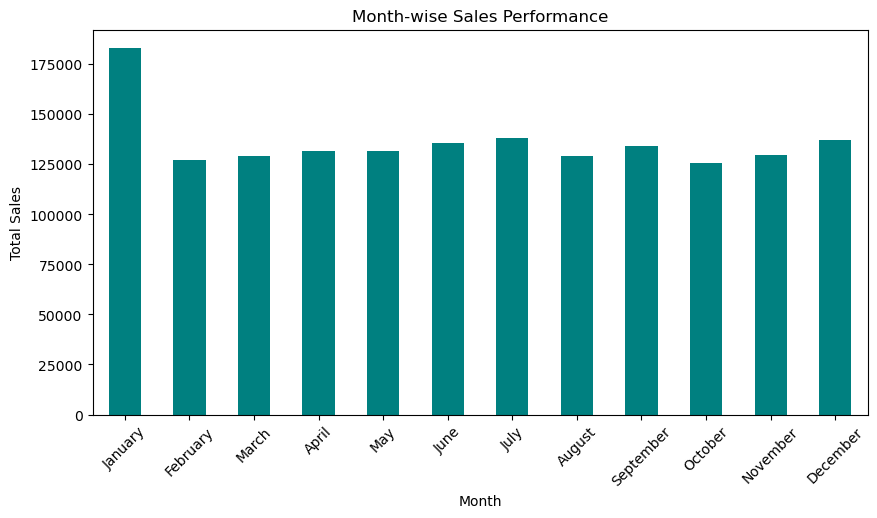

In [39]:
month_sales = df.groupby("Month Name")["Total Spent"].sum()
month_sales = month_sales.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

plt.figure(figsize=(10,5))
month_sales.plot(kind='bar', color='teal')
plt.title("Month-wise Sales Performance")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()